# Supervised Learning Python Notebook

# 1.Defining the Question

### a) Specifying the Question

A churning dataset has been provided by MegaTelco, a telecommnication service provider.

As a team of data scientists, we will be using the different variables in the dataset to  build models that will determine which customers are likely to churn (switch from one company to another).



### b) Defining the Metric for Success

The models will be considered successful if they have an accuracy of 90% and above.

### c) Understanding the context 

The data is from a Telecommunication company and has information relevant to the question.

### d) Recording the Experimental Design

For this project, I'll be doing the following:
1. Data cleaning
2. Exploratory Data Analysis with focus on univariate, bivariate and multivariate analysis
3. Logistic Regression
4. Random Forest Classifier
5. Gradient Boosted Classifier
6. KNN Model
7. SVM model
8. Naive Bayes Model

The different models built will allow us to assess their suitability and appropriateness in solving the given problem.

### e) Data Relevance

The data provided is of relevance to the question. It has a wide range of variables that will be useful in determing the assessment question.

# 2.Reading the Data

In [ ]:
# Importing all the necessary libraries
#

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Loading the Dataset
#
 
churn = pd.read_csv("churn.csv")
churn.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


# 3.Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#

churn.shape

(5000, 18)

In [ ]:
# Check datatypes of the columns
#

churn.dtypes

churn                          object
accountlength                   int64
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls                 int64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                  int64
totalintlcharge               float64
numbercustomerservicecalls      int64
dtype: object

In [ ]:
# Previewing the top of our dataset
#

churn.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [ ]:
# Previewing the bottom of our dataset
# 

churn.tail()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
4995,No,50,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,Yes,152,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,No,61,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,No,109,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0
4999,No,86,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0


In [ ]:
# Checking whether each column has an appropriate datatype
#

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   object 
 1   accountlength               5000 non-null   int64  
 2   internationalplan           5000 non-null   object 
 3   voicemailplan               5000 non-null   object 
 4   numbervmailmessages         5000 non-null   int64  
 5   totaldayminutes             5000 non-null   float64
 6   totaldaycalls               5000 non-null   int64  
 7   totaldaycharge              5000 non-null   float64
 8   totaleveminutes             5000 non-null   float64
 9   totalevecalls               5000 non-null   int64  
 10  totalevecharge              5000 non-null   float64
 11  totalnightminutes           5000 non-null   float64
 12  totalnightcalls             5000 non-null   int64  
 13  totalnightcharge            5000 

# 4.Tidying the Dataset

In [ ]:
# Check for missing values
#

churn.isnull().sum()

# There are no null values

churn                         0
accountlength                 0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
dtype: int64

In [ ]:
# Check for duplicated values
#

churn.duplicated().any()

# There are no duplicated values

False

In [ ]:
churn['churn'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Renaming columns
#

churn.rename(columns={'churn': 'churn', 'accountlength' : 'account_length', 'totalintlcalls': 'total_intl_calls', 'internationalplan': 'international_plan','voicemailplan': 'voicemail_plan',
                      'numbervmailmessages' : 'number_vmail_messages', 'totaldayminutes': 'total_day_minutes', 'totaldaycalls': 'total_day_calls',
                      'totaldaycharge': 'total_day_charge', 'totaleveminutes': 'total_eve_minutes', 'totalevecalls': 'total_eve_calls',
                      'totalevecharge': 'total_eve_charge', 'totalnightminutes': 'total_night_minutes', 'totalnightcalls' : 'total_night_calls',
                      'totalnightcharge': 'total_night_charge', 'totalintlminutes':'total_intl_minutes','totalintlcharge': 'total_intl_charge',
                      'numbercustomerservicecalls':'number_customerservice_calls'}, inplace = True)


In [ ]:
# Confirm whether the changes have been made
#

churn.head()

,churn,account_length,international_plan,voicemail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customerservice_calls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [ ]:
# Change the categorical values to numerical ones
#

churn['churn'].unique()
churn['churn'] = churn['churn'].apply({'No':0, 'Yes':1}.get)
churn.head()

,churn,account_length,international_plan,voicemail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customerservice_calls
0,0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [ ]:
# Change the categorical values to numerical ones
#

churn['international_plan'].unique()
churn['international_plan'] = churn['international_plan'].apply({'no':0, 'yes':1}.get)
churn.head()

,churn,account_length,international_plan,voicemail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customerservice_calls
0,0,128,0,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,107,0,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,137,0,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,84,1,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,75,1,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [ ]:
churn['voicemail_plan'].unique()
churn['voicemail_plan'] = churn['voicemail_plan'].apply({'no':0, 'yes':1}.get)
churn.head()

,churn,account_length,international_plan,voicemail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customerservice_calls
0,0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


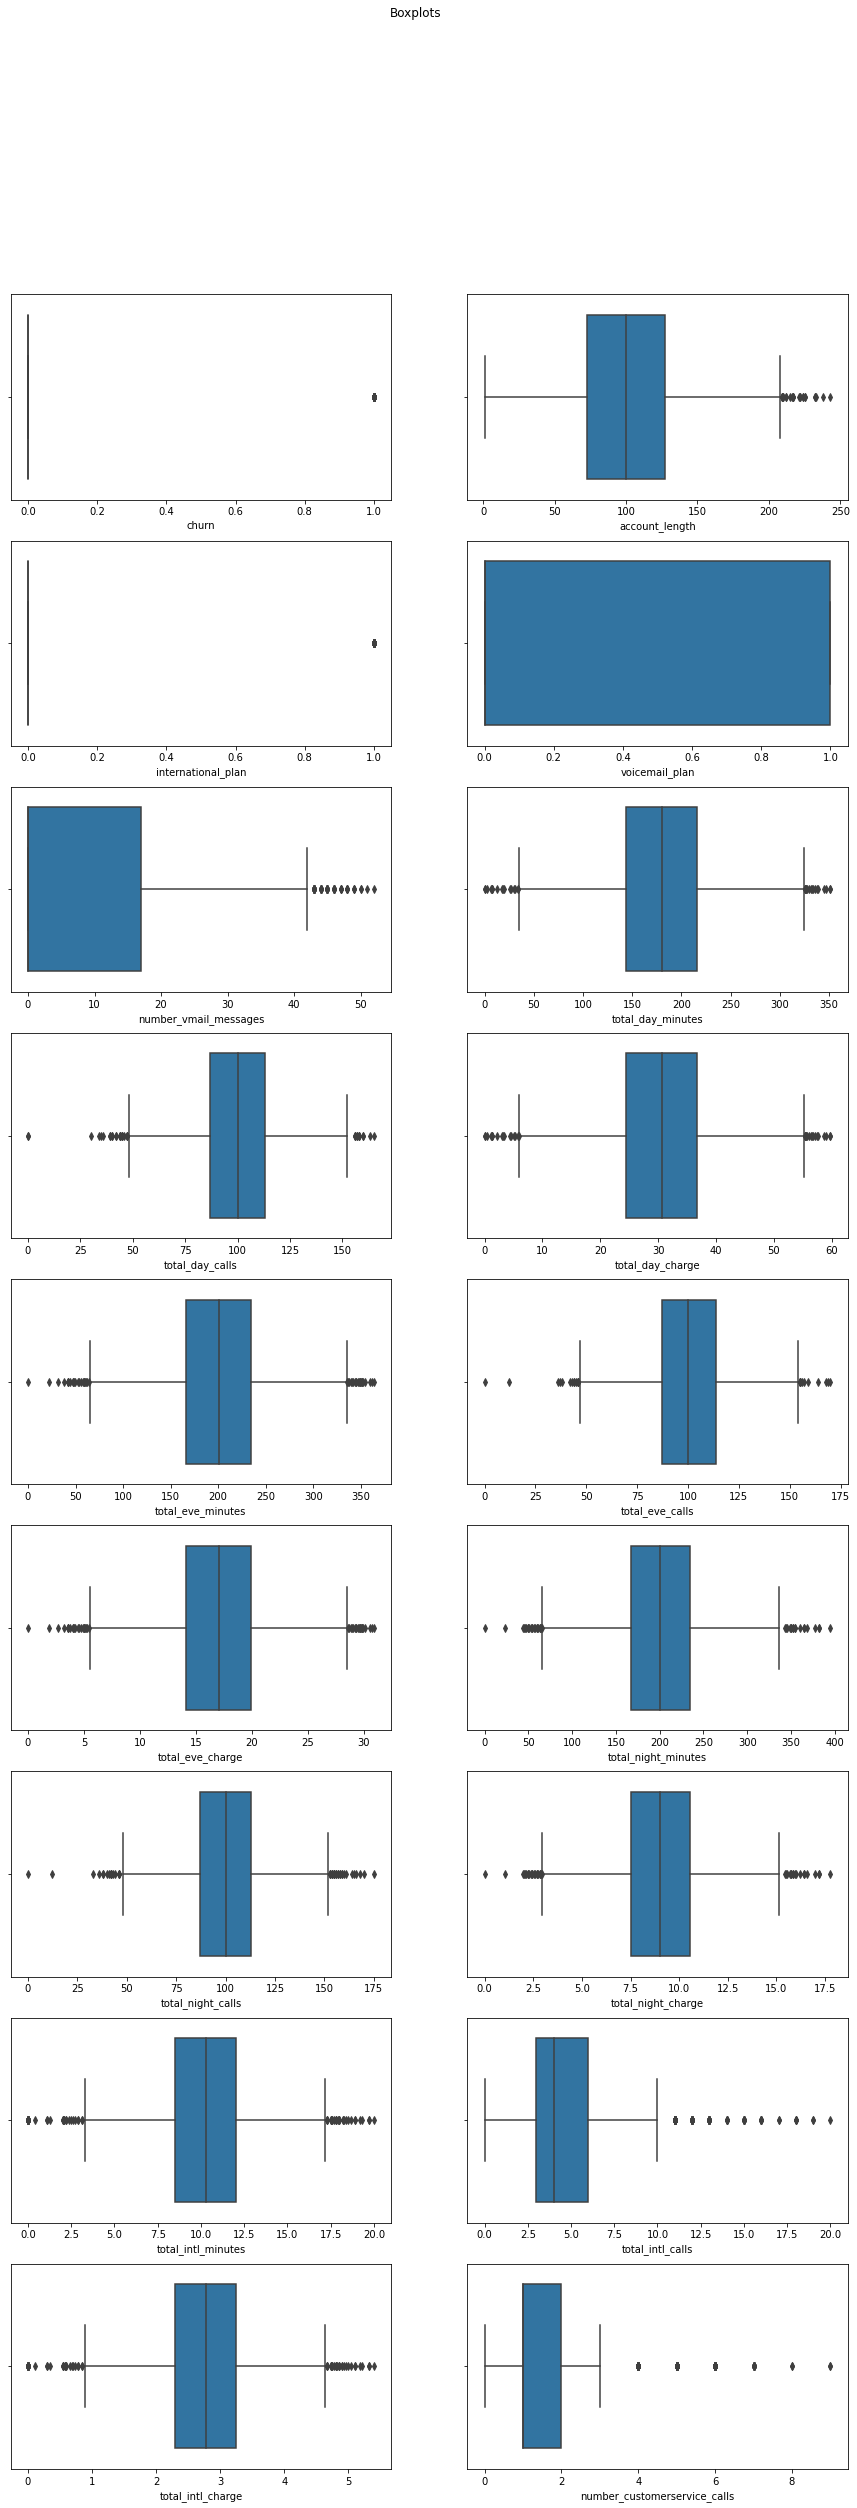

In [ ]:
# Checking for prescence of outliers using boxplots
#

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16), (ax17, ax18)) = plt.subplots(9,2, figsize=(15, 40))
	
fig.suptitle('Boxplots')

sns.boxplot(churn['churn'], ax=ax1)
sns.boxplot(churn['account_length'], ax=ax2)
sns.boxplot(churn['international_plan'], ax=ax3)
sns.boxplot(churn['voicemail_plan'], ax=ax4)
sns.boxplot(churn['number_vmail_messages'], ax=ax5)
sns.boxplot(churn['total_day_minutes'], ax=ax6)
sns.boxplot(churn['total_day_calls'], ax=ax7)
sns.boxplot(churn['total_day_charge'], ax=ax8)
sns.boxplot(churn['total_eve_minutes'], ax=ax9)
sns.boxplot(churn['total_eve_calls'], ax=ax10)
sns.boxplot(churn['total_eve_charge'], ax=ax11)
sns.boxplot(churn['total_night_minutes'], ax=ax12)
sns.boxplot(churn['total_night_calls'], ax=ax13)
sns.boxplot(churn['total_night_charge'], ax=ax14)
sns.boxplot(churn['total_intl_minutes'], ax=ax15)
sns.boxplot(churn['total_intl_calls'], ax=ax16)
sns.boxplot(churn['total_intl_charge'], ax=ax17)
sns.boxplot(churn['number_customerservice_calls'], ax=ax18)

plt.show()

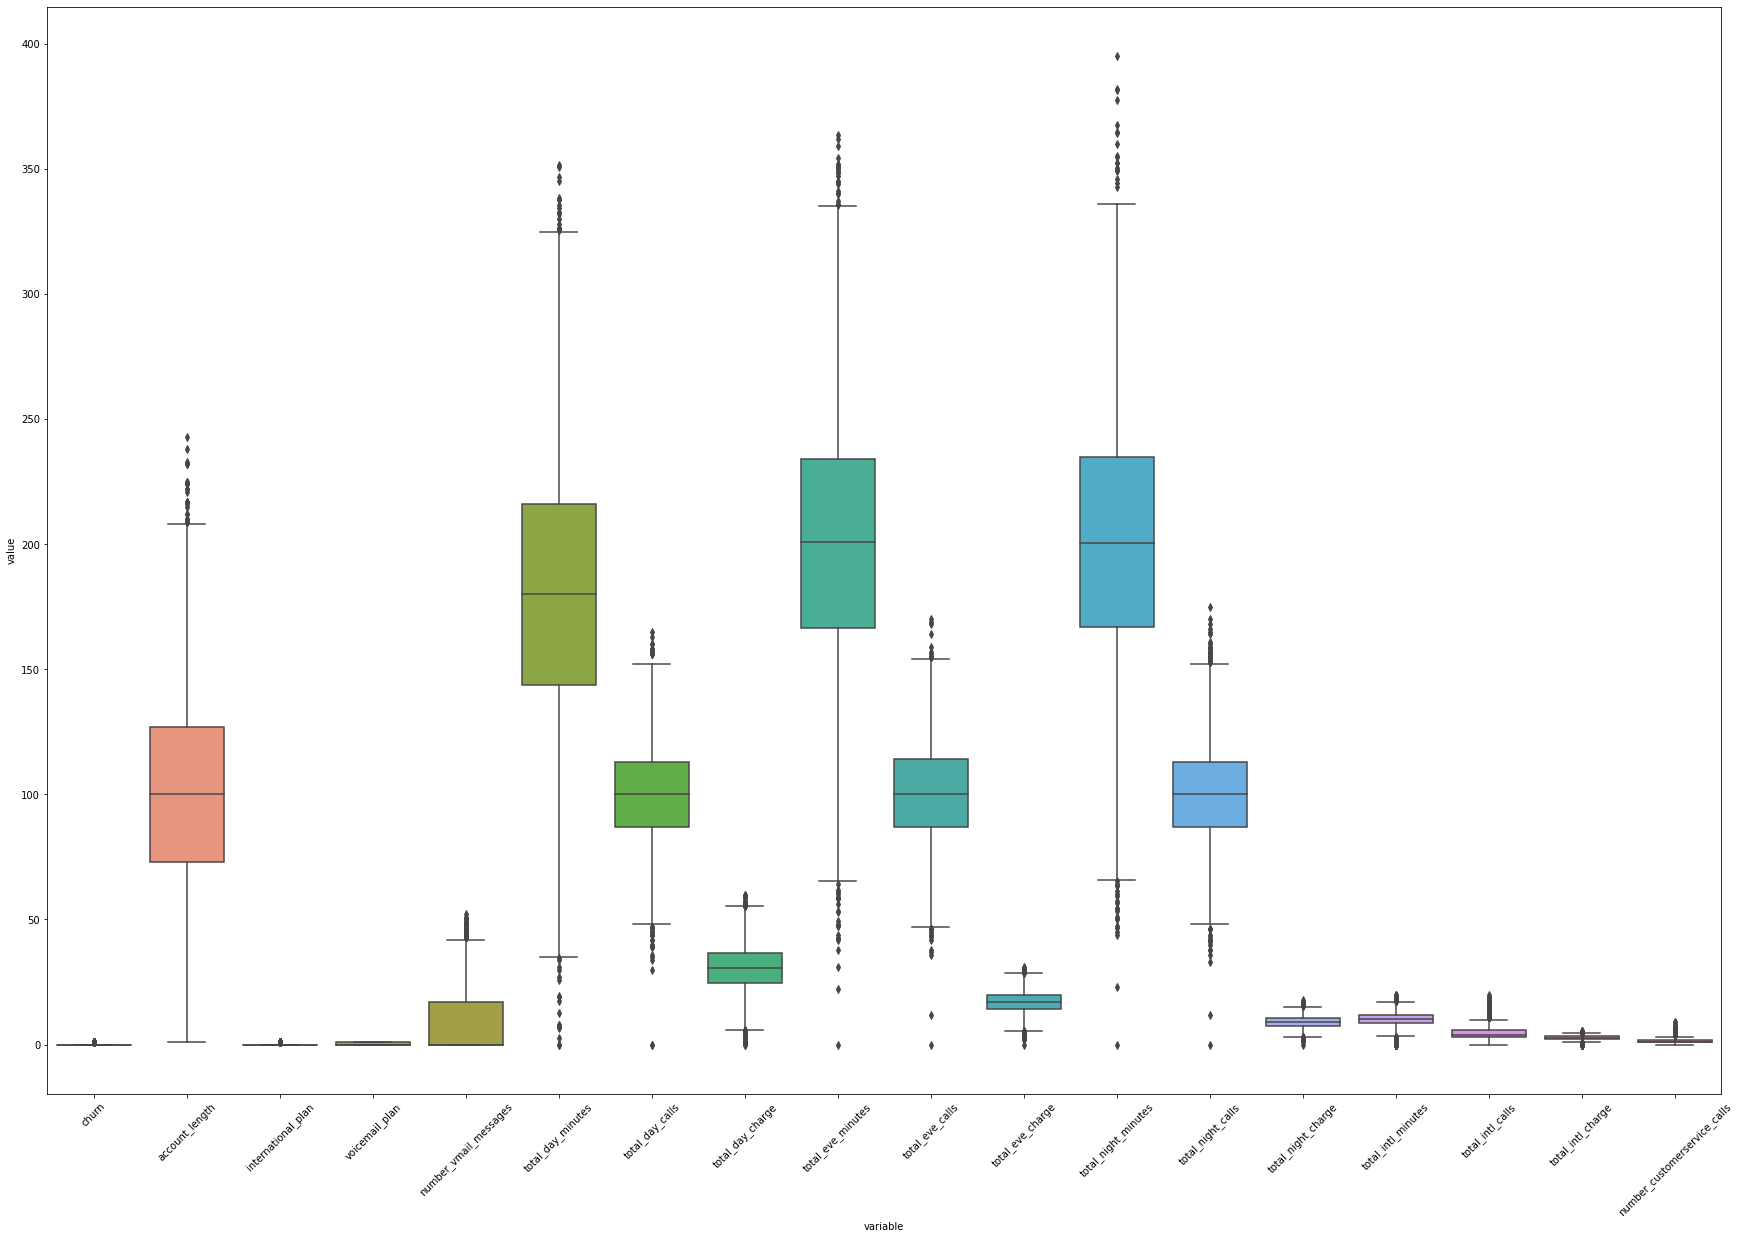

In [ ]:
# Checking for prescence of outliers: Method 2
#

df = churn[['churn', 'account_length', 'international_plan', 'voicemail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customerservice_calls']]

fig_dims = (30, 20)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation = 45)
sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

In [ ]:
# Checking for Anomalies using Z-score
#
columns = churn[['churn', 'account_length', 'international_plan', 'voicemail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customerservice_calls']]

from scipy import stats
z = np.abs(stats.zscore(columns))
print(z)

[[0.40581609 0.69894149 0.32324017 ... 0.58423577 0.0955088  0.43667564]
 [0.40581609 0.16984882 0.32324017 ... 0.58423577 1.24598231 0.43667564]
 [0.40581609 0.92569549 0.32324017 ... 0.22991664 0.69597096 1.20223603]
 ...
 [0.40581609 0.98911606 0.32324017 ... 0.17715957 1.20573758 0.43667564]
 [0.40581609 0.2202386  0.32324017 ... 0.63699285 0.63210525 1.20223603]
 [0.40581609 0.35924384 0.32324017 ... 4.70775494 0.35039211 1.20223603]]


In [ ]:
# Dropping and Confirming that our outliers have been dropped from the dataset.
#

new_churn= columns[(z < 4).all(axis=1)]
print(f"Previous dataframe size : {columns.shape[0]}")
print(f"New dataframe size: {new_churn.shape[0]}")

Previous dataframe size : 5000
New dataframe size: 4952


In [ ]:
# # Export the cleaned dataset

new_churn.to_csv('new_churn.csv')

In [ ]:
new_churn = pd.read_csv('new_churn.csv')
new_churn.head()

,Unnamed: 0,churn,account_length,international_plan,voicemail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customerservice_calls
0,0,0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,1,0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,2,0,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,3,0,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,4,0,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


# 5.Exploratory Analysis

### a) Univariate Analysis

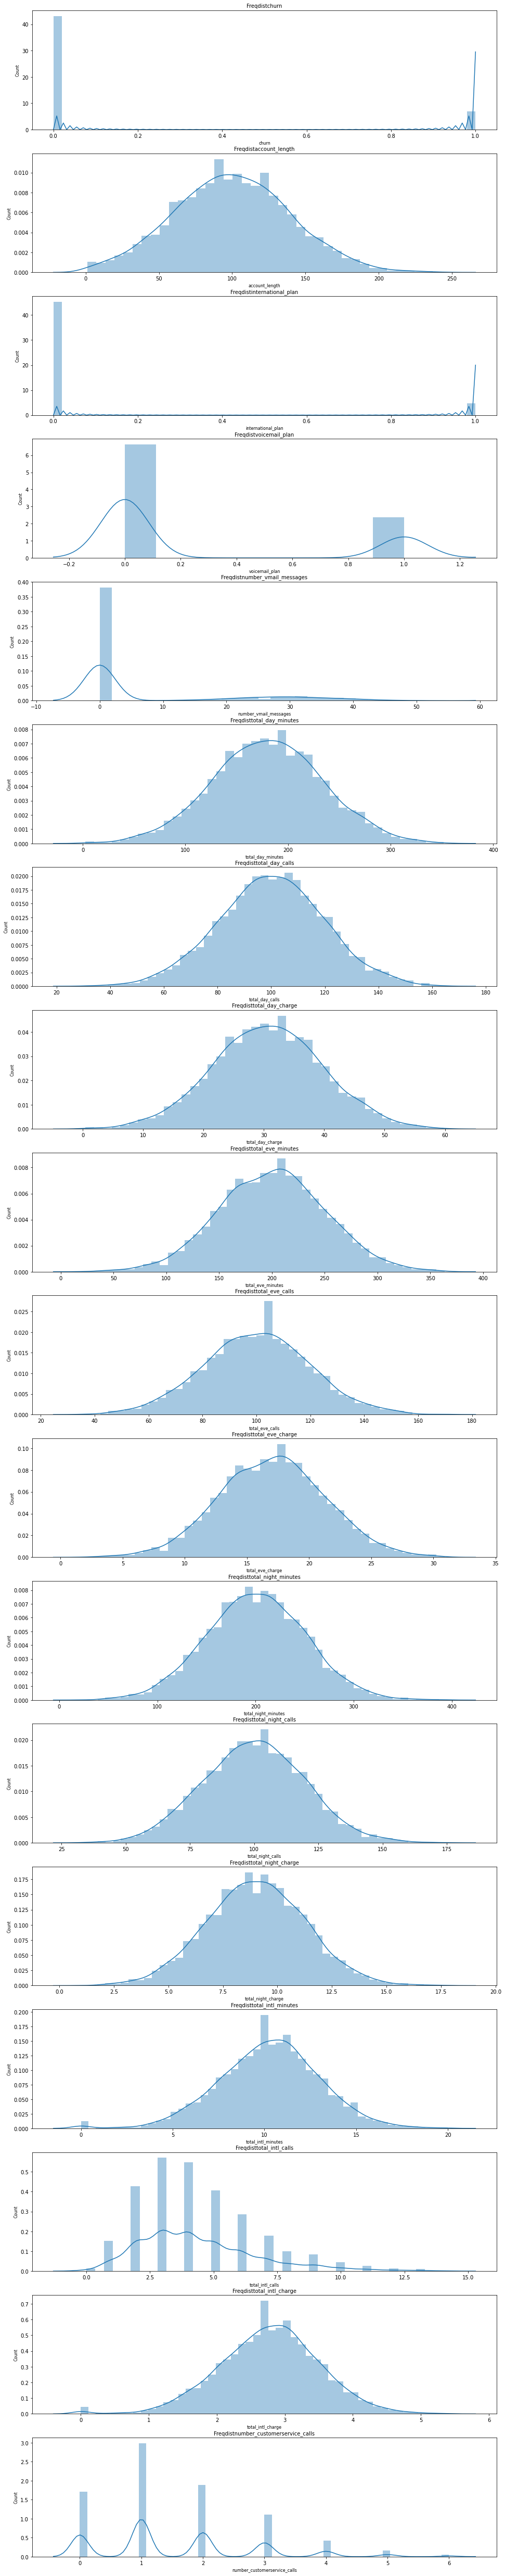

In [ ]:
# Plot the univariate distribution of the numerical columns which contains the histograms and the estimated PDF

column_names = ['churn', 'account_length', 'international_plan',
       'voicemail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customerservice_calls']
fig, ax = plt.subplots(len(column_names), figsize=(16,90))

for i, col_val in enumerate(column_names):
  sns.distplot(new_churn[col_val], hist=True, ax=ax[i])
  ax[i].set_title('Freqdist'+col_val, fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)
  ax[i].set_ylabel('Count', fontsize = 8)

plt.show()

**Observation**

1. The histograms for the variables total_intl_charge, total_intl_minutes, total_night_charge, total_night_calls, total_night_minutes, total_eve_charge, total_eve_calls, total_eve_minutes, total_day_charge, total_day_calls, total_day_minutes and account_length are symmetric or almost symmetrical; they have a somewhat normal distribution.

2. Total_intl_calls and number_vmail_messages are right skewed.

3. number_customerservice_calls has a multimodal distribution.

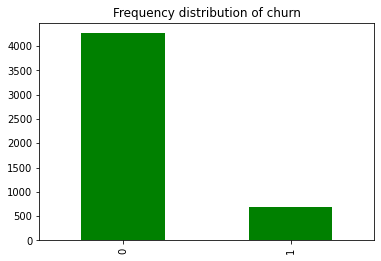

In [ ]:
new_churn['churn'].value_counts(). plot.bar(title = 'Frequency distribution of churn', color = 'green')

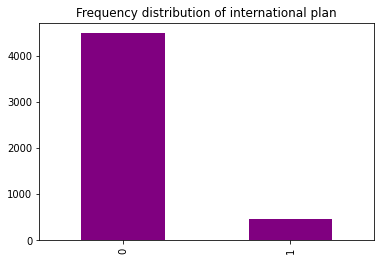

In [ ]:
new_churn['international_plan'].value_counts(). plot.bar(title = 'Frequency distribution of international plan', color = 'purple')

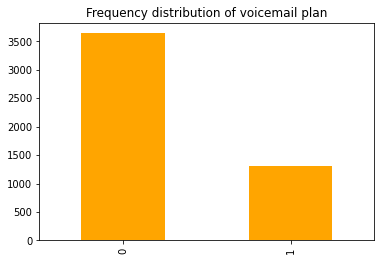

In [ ]:
new_churn['voicemail_plan'].value_counts(). plot.bar(title = 'Frequency distribution of voicemail plan', color = 'orange')

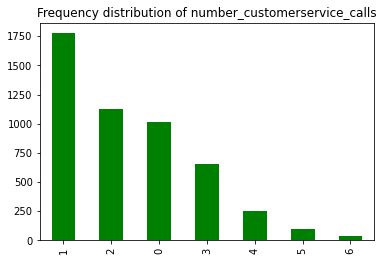

In [ ]:
new_churn['number_customerservice_calls'].value_counts(). plot.bar(title = 'Frequency distribution of number_customerservice_calls', color = 'green')

**Observation**
1. The company tends to retain it's customers as represented by 0 (No) in as much as a few customers churn (stop using their products / services) as represented by 1 (Yes)

2. Most of the customers do not have an international plan or voicemail plan as represented by 0 (No) in the graphs.

### b) Bivariate Analysis

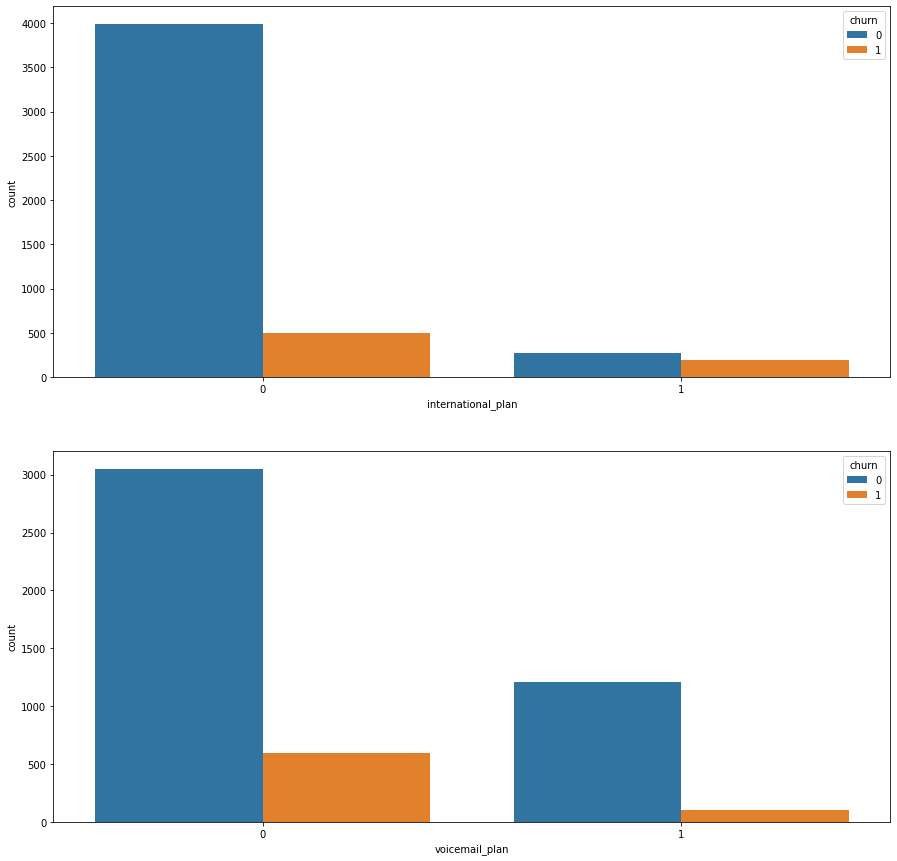

In [ ]:
# Define how the axes of our plots
f, axes = plt.subplots(2, 1, figsize=[15, 15])

sns.countplot('international_plan', hue= 'churn', data=new_churn, ax=axes[0])
sns.countplot('voicemail_plan', hue= 'churn', data=new_churn, ax=axes[1])


**Observation**

1. Of the people with no voice mail plan, a bigger proportion are not likely to churn (switch from one company to another)

2. A bigger proportion of people with no international plan are likely to not churn.

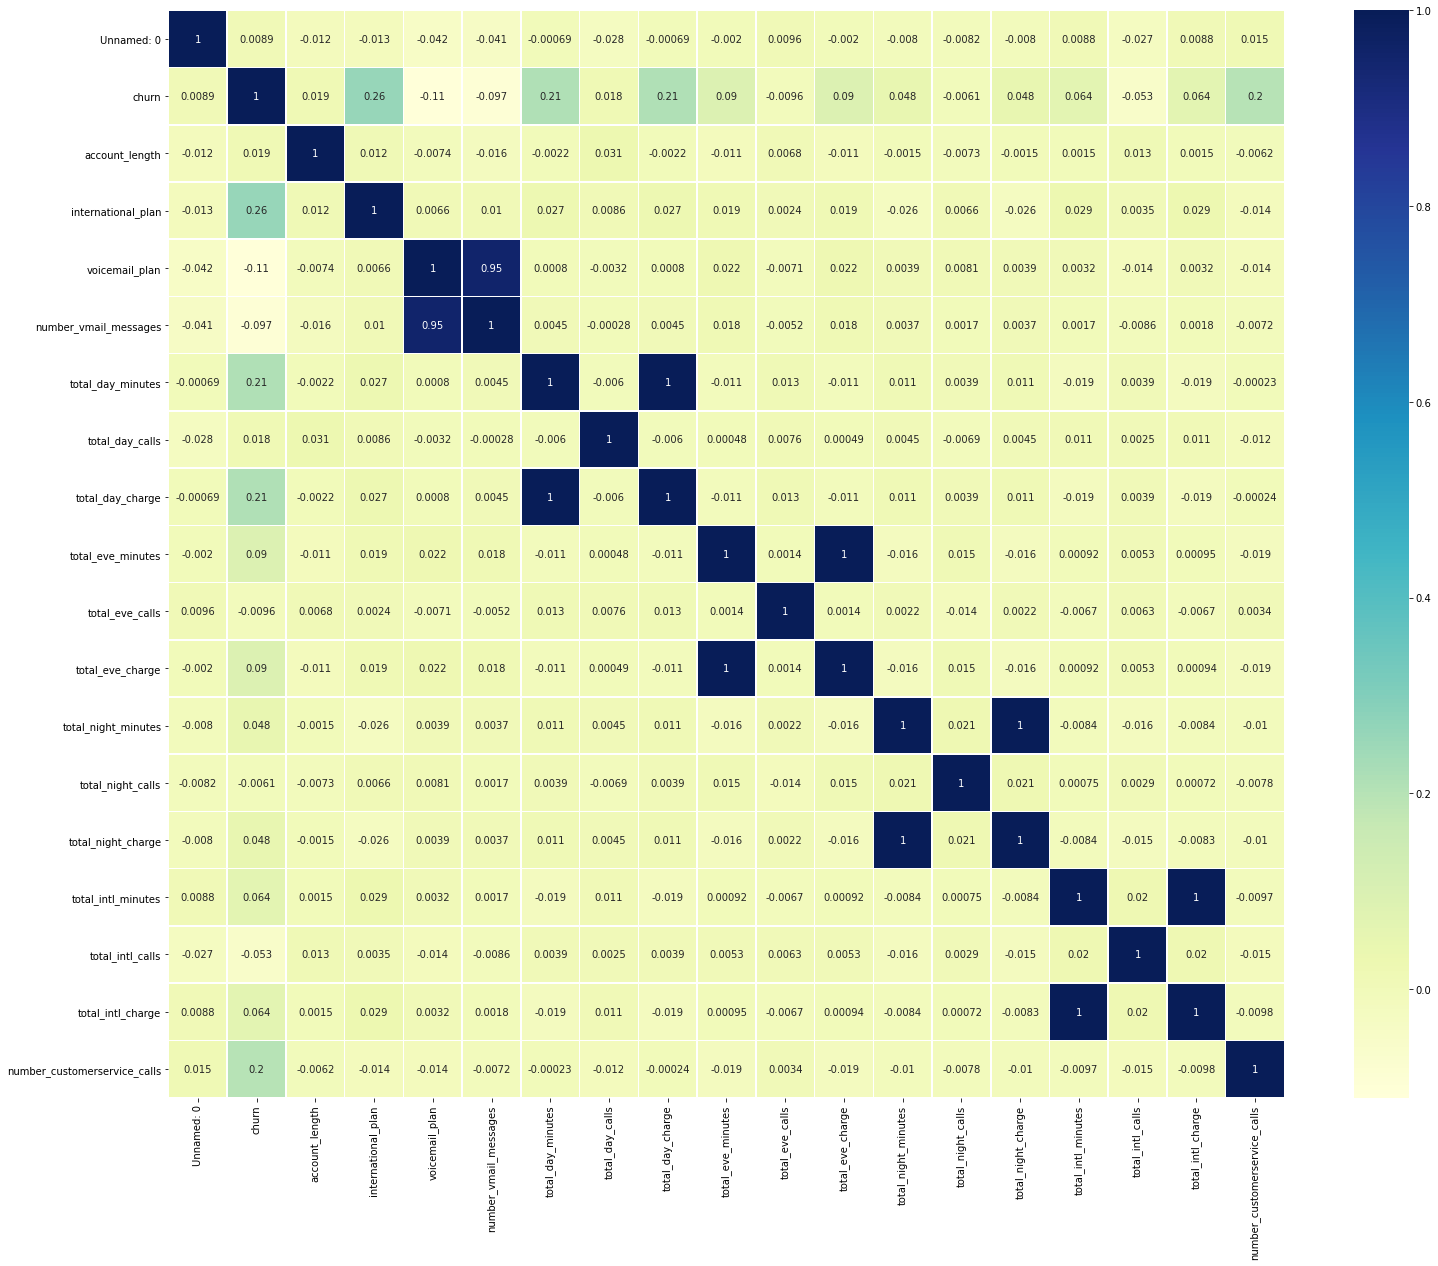

In [ ]:
# Create a correlation matrix
correlation = new_churn.corr()
correlation


fig, ax = plt.subplots(figsize=(25, 20)) 
sns.heatmap(correlation, annot=True,  linewidths=.5, ax=ax, cmap="YlGnBu")

**Observation**

1. The variables number of voicemail messages and voice mail plan are strongly positively correlated. 

2. The variables total_day_minutes and total_day_charge have a perfect positive correlation.

3. The variables total_eve_minutes and total_eve_charge have a perfect positive correlation.

4. The variables total_night_minutes and total_night_charge have a perfect positive correlation.

5. The variables total_intl_minutes and total_intl_charge have a perfect positive correlation.

The variables that have the highest correlation to churn are:

*   Number of customer service calls
*   Total day charge
*   Total day minutes
*   International charge

The variables that have the least correlation to churn are:


*   voicemail plan
*   number of voicemail messages
*   total eve calls
*   total night calls
*   total international calls








In [ ]:
new_churn.columns

Index(['Unnamed: 0', 'churn', 'account_length', 'international_plan',
       'voicemail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customerservice_calls'],
      dtype='object')

In [ ]:
print(new_churn.groupby('churn')['voicemail_plan'].mean())

churn
0    0.284206
1    0.143271
Name: voicemail_plan, dtype: float64


In [ ]:
print(new_churn.groupby('churn')['number_customerservice_calls'].mean())

churn
0    1.448486
1    2.182344
Name: number_customerservice_calls, dtype: float64


In [ ]:
print(new_churn.groupby('churn')['international_plan'].mean())

churn
0    0.064069
1    0.282200
Name: international_plan, dtype: float64


### c) Multivariate Analysis

In [ ]:
# Define our X and y variables

X = new_churn.iloc[:, 2:]
y = new_churn['churn']

In [ ]:
# Divide the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Scale the features so they are uniform

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create an instance of LDA

lda = LDA()

# Fit the lda onto our X and y variables

lda_technique = lda.fit(X, y)


# Show the coeficients of the reduced columns

lda_technique.coef_

array([[ 1.63594189e-03,  3.06448587e+00, -1.43717585e+00,
         1.81651253e-02,  3.91356615e+00,  3.08505127e-03,
        -2.29415591e+01,  5.19920522e-02, -2.55469471e-03,
        -5.32789123e-01, -5.72270680e-02, -1.44778523e-03,
         1.35864863e+00,  7.81736564e-03, -8.46987111e-02,
         2.73445718e-01,  5.72633361e-01]])

In [ ]:
# Create a datframe from the array we got so we can extract the column names

new = pd.DataFrame(index = X.columns.values, data = lda_technique.coef_[0].T)
new.sort_values(0, ascending=False)

,0
total_day_minutes,3.913566
international_plan,3.064486
total_night_charge,1.358649
number_customerservice_calls,0.572633
total_intl_charge,0.273446
total_eve_minutes,0.051992
number_vmail_messages,0.018165
total_intl_minutes,0.007817
total_day_calls,0.003085
account_length,0.001636


**Observation**

From the above, we can see that the features that contribute largely to whether a customer will change from one company to another (churn) are as follows:

1. total_day_minutes	
2. international_plan
3. total_night_charge	
4. number_customerservice_calls
5. total_intl_charge	
6. total_eve_minutes	
7. number_vmail_messages	
8. total_intl_minutes	
9. total_day_calls
10. account_length



# 6.Implementing the Solution

### Multicollinearity check

Check for and remove any variables that are colinear

In [ ]:
# Focus here is on the independent variables only
independent_variables = new_churn.drop(columns=['Unnamed: 0', 'churn'])

# Let's display the correlations between the variables
a = independent_variables.corr()
a

,account_length,international_plan,voicemail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customerservice_calls
account_length,1.000000,0.012247,-0.007430,-0.015538,-0.002152,0.031129,-0.002154,-0.011141,0.006832,-0.011137,-0.001486,-0.007265,-0.001499,0.001526,0.012539,0.001528,-0.006193
international_plan,0.012247,1.000000,0.006566,0.010105,0.026972,0.008606,0.026975,0.019021,0.002407,0.019020,-0.025824,0.006586,-0.025827,0.028956,0.003454,0.028918,-0.013558
voicemail_plan,-0.007430,0.006566,1.000000,0.954418,0.000802,-0.003162,0.000798,0.021850,-0.007137,0.021854,0.003863,0.008122,0.003862,0.003172,-0.014450,0.003229,-0.014010
number_vmail_messages,-0.015538,0.010105,0.954418,1.000000,0.004464,-0.000281,0.004458,0.017889,-0.005196,0.017895,0.003698,0.001714,0.003692,0.001740,-0.008591,0.001789,-0.007164
total_day_minutes,-0.002152,0.026972,0.000802,0.004464,1.000000,-0.005987,1.000000,-0.010738,0.012541,-0.010747,0.010845,0.003948,0.010831,-0.019227,0.003941,-0.019160,-0.000231
total_day_calls,0.031129,0.008606,-0.003162,-0.000281,-0.005987,1.000000,-0.005986,0.000483,0.007604,0.000488,0.004516,-0.006947,0.004518,0.010569,0.002505,0.010629,-0.011954
total_day_charge,-0.002154,0.026975,0.000798,0.004458,1.000000,-0.005986,1.000000,-0.010735,0.012541,-0.010745,0.010847,0.003947,0.010833,-0.019232,0.003937,-0.019164,-0.000236
total_eve_minutes,-0.011141,0.019021,0.021850,0.017889,-0.010738,0.000483,-0.010735,1.000000,0.001383,1.000000,-0.016415,0.015087,-0.016421,0.000922,0.005343,0.000948,-0.018676
total_eve_calls,0.006832,0.002407,-0.007137,-0.005196,0.012541,0.007604,0.012541,0.001383,1.000000,0.001398,0.002158,-0.014226,0.002176,-0.006707,0.006317,-0.006747,0.003444
total_eve_charge,-0.011137,0.019020,0.021854,0.017895,-0.010747,0.000488,-0.010745,1.000000,0.001398,1.000000,-0.016425,0.015090,-0.016431,0.000918,0.005348,0.000944,-0.018688


In [ ]:
pd.DataFrame(np.linalg.inv(a.values), index = a.index, columns=a.columns)

,account_length,international_plan,voicemail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customerservice_calls
account_length,1.002660,-0.012646,-0.087277,0.098888,-2.320737e+01,-0.031152,2.320956e+01,9.107714e+00,-0.006599,-9.096060e+00,-9.454993,0.007723,9.456002,-0.055143,-0.012982,0.054718,0.005215
international_plan,-0.012646,1.003499,0.037014,-0.045490,2.968601e+01,-0.008118,-2.971410e+01,-3.181782e+00,-0.002208,3.163105e+00,-1.060707,-0.007000,1.086611,-2.752616,-0.002166,2.723380,0.013201
voicemail_plan,-0.087277,0.037014,11.260884,-10.747436,7.163174e+01,0.036029,-7.159455e+01,-3.412564e+01,0.022276,3.407294e+01,37.280480,-0.073433,-37.280572,8.521096,0.074577,-8.539176,0.080318
number_vmail_messages,0.098888,-0.045490,-10.747436,11.258848,-1.284662e+02,-0.034294,1.284265e+02,4.471169e+01,-0.016167,-4.467904e+01,-39.326481,0.069138,39.322538,-4.797368,-0.062069,4.813135,-0.069853
total_day_minutes,-23.207373,29.686009,71.631736,-128.466234,1.017765e+07,14.616436,-1.017765e+07,4.500593e+04,-1.536453,-4.497623e+04,34785.910128,-17.676074,-34764.854468,3990.312942,-40.372258,-4034.915253,-47.933668
total_day_calls,-0.031152,-0.008118,0.036029,-0.034294,1.461644e+01,1.001889,-1.461008e+01,1.120259e+01,-0.007363,-1.120317e+01,1.495452,0.006513,-1.500276,4.172448,-0.001110,-4.182779,0.011432
total_day_charge,23.209563,-29.714097,-71.594548,128.426476,-1.017765e+07,-14.610082,1.017765e+07,-4.502636e+04,1.523415,4.499668e+04,-34794.139473,17.672008,34773.073073,-3985.591422,40.368141,4030.213610,47.934056
total_eve_minutes,9.107714,-3.181782,-34.125636,44.711689,4.500593e+04,11.202588,-4.502636e+04,2.215217e+06,32.397050,-2.215217e+06,-11669.336835,6.945886,11647.212798,2619.344403,9.499590,-2629.652651,-26.934726
total_eve_calls,-0.006599,-0.002208,0.022276,-0.016167,-1.536453e+00,-0.007363,1.523415e+00,3.239705e+01,1.001445,-3.239926e+01,11.304264,0.014059,-11.307244,-2.820188,-0.005991,2.826773,-0.003566
total_eve_charge,-9.096060,3.163105,34.072941,-44.679040,-4.497623e+04,-11.203170,4.499668e+04,-2.215217e+06,-32.399260,2.215219e+06,11665.215876,-6.960705,-11643.075296,-2617.580147,-9.505071,2627.888585,26.952502


From the heat map under bivariate analysis, there are 5 pairs of variables that are strongly positively correlated. 

I'll drop one variable each from the pairs to check if the VIF score of the variables will reduce to below 4.

Those variables are: total_day_charge, total_eve_charge, total_night_charge, total_intl_charge, number_vmail_messages

In [ ]:
churn_revised = independent_variables.drop(columns=['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge', 'number_vmail_messages'])

correlations = churn_revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,account_length,international_plan,voicemail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customerservice_calls
account_length,1.001580,-0.012191,0.006975,0.002496,-0.030843,0.011381,-0.006428,0.001180,0.006870,-0.000572,-0.012273,0.005883
international_plan,-0.012191,1.003114,-0.006092,-0.028100,-0.008112,-0.018572,-0.002314,0.025952,-0.006761,-0.029074,-0.001967,0.012901
voicemail_plan,0.006975,-0.006092,1.001110,-0.000967,0.003079,-0.021474,0.006872,-0.003886,-0.007444,-0.003180,0.014691,0.013684
total_day_minutes,0.002496,-0.028100,-0.000967,1.001614,0.006074,0.011235,-0.012449,-0.011216,-0.003813,0.019911,-0.004448,0.000160
total_day_calls,-0.030843,-0.008112,0.003079,0.006074,1.001453,-0.000614,-0.007427,-0.004987,0.006849,-0.010144,-0.001749,0.011607
total_eve_minutes,0.011381,-0.018572,-0.021474,0.011235,-0.000614,1.001936,-0.001985,0.016377,-0.015002,0.000303,-0.005214,0.018211
total_eve_calls,-0.006428,-0.002314,0.006872,-0.012449,-0.007427,-0.001985,1.000618,-0.002496,0.014213,0.006667,-0.006318,-0.003492
total_night_minutes,0.001180,0.025952,-0.003886,-0.011216,-0.004987,0.016377,-0.002496,1.001972,-0.021452,0.007304,0.015462,0.011021
total_night_calls,0.006870,-0.006761,-0.007444,-0.003813,0.006849,-0.015002,0.014213,-0.021452,1.001163,-0.000622,-0.003280,0.007155
total_intl_minutes,-0.000572,-0.029074,-0.003180,0.019911,-0.010144,0.000303,0.006667,0.007304,-0.000622,1.001925,-0.019639,0.008937


All the VIF scores have dropped to below 5, showing that no variables are colinear.
> 1.total_day_charge 

> 2.total_eve_charge 

> 3.total_night_charge

> 4.total_intl_charge 

> 5.number_vmail_messages

### Residual plots 
> #### Creating a model based on our revised independent variables and displaying a residual plot for it as below;

In [ ]:
from sklearn.linear_model import LinearRegression

X = churn_revised.values
y = new_churn['churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for churning based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# We then describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.0071788098737428216

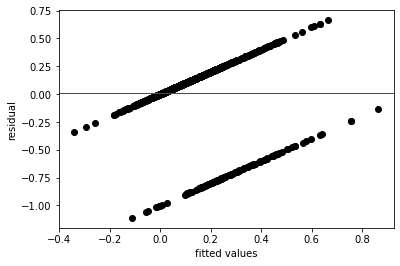

In [ ]:
# Plotting the residuals

import matplotlib.pyplot as plt

plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

From the above residual plot, we see that our residuals are nowhere near the mean which is not so good. For this reason we are going to perform heteroscedasticity test (Bartlett's test to be specific) as done below

> ### Heteroskedasticity testing

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


This test normally establishes as a null hypothesis that the variance is equal or homogeneous for all the datapoints, and the new hypothesis that the variance is different or heterogeneous for at least one pair of datapoints.

From our outcome, we established the null hypothesis that the variance for all the datapoints are equal or homogeneous.

### Balancing the dataset

> First we are going to do upsampling to make sure that both our X and Y train have the same records.

In [ ]:
# Define our X and y variables

X = churn_revised.iloc[:, 0:]
y = new_churn['churn']

print(X.shape)
print(y.shape)

(4952, 12)
(4952,)


In [ ]:
# We will get the number of records for No(0) and Yes(1) on the colunm churn
#
no = new_churn[new_churn['churn'] == 0]
yes = new_churn[new_churn['churn'] == 1]

print(no.shape, yes.shape)

# Our dataset is imbalanced, we have 4261 records of no and 691 records of yes

(4261, 19) (691, 19)


In [ ]:
# Since we have a small dataset and we don't want to lose any information we will perform upsampling(oversampling)
# We are going to use RandomOverSampler to to handle our imbalanced data
#

from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler(ratio = 1)
X_res, y_res = os.fit_sample(X,y)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# To confirm if the records are balanced
#
print(X_res.shape, y_res.shape)

(8522, 12) (8522,)


In [ ]:
# We are then going to compare the original y values with the balanced y values 
#

from collections import Counter

print("Original dataset shape {}".format(Counter(y)))
print("Resampled dataset shape {}". format(Counter(y_res)))

# This output gives an evidence that the dataset has been balanced, 4261 no values = 4261 yes values

Original dataset shape Counter({0: 4261, 1: 691})
Resampled dataset shape Counter({0: 4261, 1: 4261})


1    4261
0    4261
dtype: int64

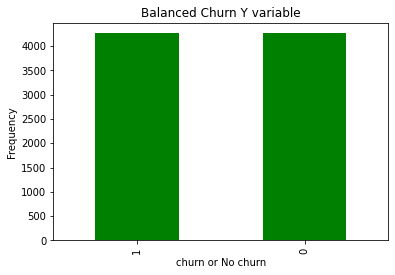

In [ ]:
pd.value_counts(y_res).plot.bar(color = 'green')
plt.title('Balanced Churn Y variable')
plt.xlabel('churn or No churn')
plt.ylabel('Frequency')
pd.value_counts(y_res)

In [ ]:
# We are now going to split our balanced data into training and test sets
#

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape, y_train.shape)

(6817, 12) (6817,)


### Model 1: Logistic Regression

In [ ]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

# We are going to do parameter tuning to improve our model performance using GridSearchCV

params = [
          {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
           'C' : [-4,1,2, 4, 5,20],
           'solver' : ['lbfgs', 'newton-cg', 'liblnear', 'sag', 'saga'],
           'max_iter' : [100, 1000, 2500, 500]
           }
]

from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()
model = GridSearchCV(logreg, params, cv = 5, verbose = True, n_jobs = -1)

model.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 907 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1244 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 2260 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  9.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [-4, 1, 2, 4, 5, 20],
                          'max_iter': [100, 1000, 2500, 500],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblnear', 'sag',
                                     'saga']}],
             pre_dispatch='2*n_jobs', re

In [ ]:
# Using our model to make a prediction
#
y_pred = model.predict(X_test)

In [ ]:
# Creating a comparison dataframe for the predicted and the original values
# 
comparison_df = pd.DataFrame({"Actual" : y_test, "Predicted": y_pred})
comparison_df.head()

,Actual,Predicted
0,1,0
1,1,0
2,1,1
3,0,0
4,0,0


In [ ]:
# Summary statistics for out comparison dataframe
#
comparison_df.describe()

,Actual,Predicted
count,1705.000000,1705.000000
mean,0.510850,0.494428
std,0.500029,0.500116
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
# Model evaluation
#
from sklearn import metrics

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.24633431085043989
Mean Squared Error: 0.24633431085043989
Root Mean Squared Error: 0.49632077414756665


We can see that the value of root mean squared error is 0.496
which is way greater than 10% of the mean of the actual y.

This means that our algorithm was not very accurate and therefore won't make very good predictions.

In [ ]:
# Evaluating the model performance
#
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

# Out the 834 actual 0(no records), 196 were predicted to 1(yes records) or misclassified.
# Out of the 871 actual 1(yes records) emails, 224 were predicted to be 0(no records) or misclassified.
# Our Logistic regression model was 75% accurate, so we conclude that the model did not perform very well.

[[638 196]
 [224 647]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       834
           1       0.77      0.74      0.75       871

    accuracy                           0.75      1705
   macro avg       0.75      0.75      0.75      1705
weighted avg       0.75      0.75      0.75      1705



### Model 2: RandomForestClassifier

In [ ]:
# Importing the model
#
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# We are going to do a little parameter tuning to improve the performance of our model

params = {'n_estimators':[100,200,300,400,500], 'max_depth':[4,5,7,8,10], 'min_samples_split':[10,15,20,25]}
forest = RandomForestClassifier()
model = GridSearchCV(forest, params, cv = 5, n_jobs = -1)

# Fitting the model

model.fit(X_train,y_train)
model.best_params_

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 500}

In [ ]:
# Making predictions based on the model we've trained
#
y_pred = model.predict(X_test)

In [ ]:
# Creating a comparison dataframe
#
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.head()

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0


In [ ]:
# Summary statistics of the comparison dataframe
#
comparison_frame.describe()

,Actual,Predicted
count,1705.000000,1705.000000
mean,0.510850,0.472727
std,0.500029,0.499402
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
# And now we assess the errors
#

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07096774193548387
Mean Squared Error: 0.07096774193548387
Root Mean Squared Error: 0.26639771383306554


We can see that the value of root mean squared error is 0.266
which is greater than 10% of the mean of the actual y.

Since the RMSE value is quite close to 0, this means that our algorithm is quite accurate and can make reasonably good predictions.

In [ ]:
# Evaluating the model performance
#
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

# Out the 834 actual 0(no records), only 28 were predicted to be 1(yes records) or misclassified.
# Out of the 871 actual 1(yes records), 93 were predicted to be 0(no records) or misclassified.
# Our RandomForestClassifier model is 93% accurate, therefore we conclude that the model did perform better than logistic regression model.

[[806  28]
 [ 93 778]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       834
           1       0.97      0.89      0.93       871

    accuracy                           0.93      1705
   macro avg       0.93      0.93      0.93      1705
weighted avg       0.93      0.93      0.93      1705



In [ ]:
# Getting the numerical feature importances
test_features = churn_revised.columns
importances = model.best_estimator_.feature_importances_

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) 
print()

# We then sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('account_length', 0.03), ('international_plan', 0.13), ('voicemail_plan', 0.04), ('total_day_minutes', 0.3), ('total_day_calls', 0.03), ('total_eve_minutes', 0.09), ('total_eve_calls', 0.03), ('total_night_minutes', 0.05), ('total_night_calls', 0.03), ('total_intl_minutes', 0.06), ('total_intl_calls', 0.04), ('number_customerservice_calls', 0.17)]

Variable: total_day_minutes    Importance: 0.3
Variable: number_customerservice_calls Importance: 0.17
Variable: international_plan   Importance: 0.13
Variable: total_eve_minutes    Importance: 0.09
Variable: total_intl_minutes   Importance: 0.06
Variable: total_night_minutes  Importance: 0.05
Variable: voicemail_plan       Importance: 0.04
Variable: total_intl_calls     Importance: 0.04
Variable: account_length       Importance: 0.03
Variable: total_day_calls      Importance: 0.03
Variable: total_eve_calls      Importance: 0.03
Variable: total_night_calls    Importance: 0.03


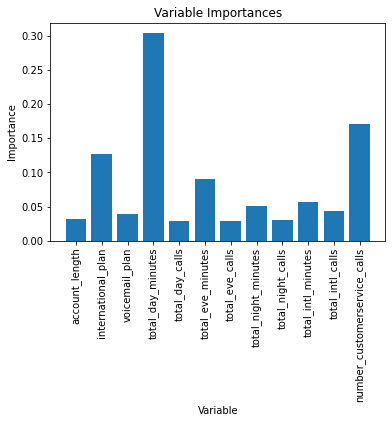

In [ ]:
# Import matplotlib for plotting the importances
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Making a bar chart
plt.bar(x_values, importances, orientation = 'vertical' )
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

> ### Model 3: GradientBoostingClassifier

In [ ]:
# We import the necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# We are going to do a little parameter tuning to improve the performance of our model

params = {'n_estimators':[2,3,4,5,6,7,8,9,13,11], 'max_depth':[4,5,7,8], 'learning_rate':[0.1,0.3,0.7,0.9]}
grad_b = GradientBoostingClassifier()
model = GridSearchCV(grad_b, params, cv=5)

# Fitting our model

model.fit(X_train,y_train)
model.best_params_

{'learning_rate': 0.7, 'max_depth': 8, 'n_estimators': 13}

In [ ]:
# Making predictions
#
y_gpred = model.predict(X_test)

In [ ]:
# Comparison df
#
com_df = pd.DataFrame({"Actual": y_test , "Predicted": y_gpred})
com_df.head()

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0


In [ ]:
# Summary Statistics for the comparison dataset
#
com_df.describe()

,Actual,Predicted
count,1705.000000,1705.000000
mean,0.510850,0.521408
std,0.500029,0.499688
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
# Assessing the errors
#
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_gpred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_gpred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_gpred)))

Mean Absolute Error: 0.012903225806451613
Mean Squared Error: 0.012903225806451613
Root Mean Squared Error: 0.11359236684941296


We can see that the value of root mean squared error is 0.113
which is greater than 10% of the mean of the actual y.

The RMSE value is very close to 0, showing that the algorithm will make good and accurate predictions.

In [ ]:
# Evaluating the model performance
#
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_gpred))
print(classification_report(y_test, y_gpred))

# Out the 834 actual 0(no records), only 20 were predicted to be 1(yes records)
# Out of the 871 actual 1(yes records), only 2 were predicted to be 0(no records)
# Our GradientBoostingClassifier model is 99% accurate, therefore we conclude that the model did perform very as compared to both RandomForestClassifier and Logistic regression model.

[[814  20]
 [  2 869]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       834
           1       0.98      1.00      0.99       871

    accuracy                           0.99      1705
   macro avg       0.99      0.99      0.99      1705
weighted avg       0.99      0.99      0.99      1705



### Model 4: KNN Model


In [ ]:
# Scale the features so they are uniform

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# I'll do hyperparameter tuning using GridSearchCV

# List Hyperparameters that we want to tune

leaf_size = list(range(1,20))
n_neighbors = list(range(1,20))
p=[1,2]

# Convert them to a dictionary

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

# Instantiate the KNeighborsClassifier

clf = KNeighborsClassifier()

# Use GridSearch

grid = GridSearchCV(clf, hyperparameters, cv=10)

In [ ]:
# Fit the model

best_model = grid.fit(X_train,y_train)

In [ ]:
# Print The value of best Hyperparameters

print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 1


In [ ]:
# Make predictions on the test data

grid_pred = grid.predict(X_test)

# Compare the actual output values for X_test with the predicted values

prediction = pd.DataFrame({'Actual': y_test, 'Predicted': grid_pred})
prediction.describe()

,Actual,Predicted
count,1705.000000,1705.000000
mean,0.510850,0.545455
std,0.500029,0.498076
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
# Assessing the errors
#
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, grid_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, grid_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, grid_pred)))

Mean Absolute Error: 0.03695014662756598
Mean Squared Error: 0.03695014662756598
Root Mean Squared Error: 0.19222420926502984


We can see that the value of root mean squared error is 0.192
which is greater than 10% of the mean of the actual y.

This means that our algorithm was not very accurate but can still make reasonably good predictions. The RMSE value is low and quite close to 0.

In [ ]:
# Evaluate the performance of the model

print("Accuracy:",metrics.accuracy_score(y_test, grid_pred))
print(confusion_matrix(y_test, grid_pred))
print(classification_report(y_test, grid_pred))

Accuracy: 0.963049853372434
[[773  61]
 [  2 869]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       834
           1       0.93      1.00      0.97       871

    accuracy                           0.96      1705
   macro avg       0.97      0.96      0.96      1705
weighted avg       0.97      0.96      0.96      1705



Out of the 834 actual 0 ('no' records), only 61 are misclassified - predicted to be 1 ('yes' records).

Out of the 871 actual 1 ('yes' records), only 2 are misclassified - predicted to be 0 ('no' records).

The KNN model has an accuracy of 96%. It performs better than the Random Forest Classifier and the Logistic Regression model. The Gradient Booosting Classifier however performs better than this model.

### Model 5: SVM Model

In [ ]:
# Use RandomizedSearchCV to do hyperparameter tuning

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001],  
              'kernel': ['linear', 'rbf', 'poly']}  
  
random = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

In [ ]:
# fitting the model for grid search 
random.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] kernel=rbf, gamma=0.001, C=1000 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... kernel=rbf, gamma=0.001, C=1000, score=0.859, total=   2.3s
[CV] kernel=rbf, gamma=0.001, C=1000 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] ..... kernel=rbf, gamma=0.001, C=1000, score=0.859, total=   2.1s
[CV] kernel=rbf, gamma=0.001, C=1000 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV] ..... kernel=rbf, gamma=0.001, C=1000, score=0.863, total=   2.1s
[CV] kernel=rbf, gamma=0.001, C=1000 .................................
[CV] ..... kernel=rbf, gamma=0.001, C=1000, score=0.866, total=   2.3s
[CV] kernel=rbf, gamma=0.001, C=1000 .................................
[CV] ..... kernel=rbf, gamma=0.001, C=1000, score=0.869, total=   2.1s
[CV] kernel=rbf, gamma=0.01, C=1000 ..................................
[CV] ...... kernel=rbf, gamma=0.01, C=1000, score=0.905, total=   7.4s
[CV] kernel=rbf, gamma=0.01, C=1000 ..................................
[CV] ...... kernel=rbf, gamma=0.01, C=1000, score=0.908, total=   7.0s
[CV] kernel=rbf, gamma=0.01, C=1000 ..................................
[CV] ...... kernel=rbf, gamma=0.01, C=1000, score=0.909, total=   6.4s
[CV] kernel=rbf, gamma=0.01, C=1000 ..................................
[CV] ...... kernel=rbf, gamma=0.01, C=1000, score=0.910, total=   7.1s
[CV] kernel=rbf, gamma=0.01, C=1000 ..................................
[CV] .

In [ ]:
# print best parameter after tuning 
print(random.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(random.best_estimator_) 

{'kernel': 'rbf', 'gamma': 1, 'C': 10}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
# Make predictions on the test data

y_predictions = random.predict(X_test) 

# Compare the actual output values for X_test with the predicted values

prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_predictions})
prediction.describe()


,Actual,Predicted
count,1705.000000,1705.000000
mean,0.510850,0.509091
std,0.500029,0.500064
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
# Assessing the errors
#

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))

Mean Absolute Error: 0.004105571847507331
Mean Squared Error: 0.004105571847507331
Root Mean Squared Error: 0.06407473642167662


We can see that the value of root mean squared error is 0.064
which is slightly higher than 10% of the mean of the actual y.

This means that our algorithm was has a very high accuracy and can actually make very good predictions.

In [ ]:
# Evaluate the performance of the model

print("Accuracy:",metrics.accuracy_score(y_test, y_predictions))
print(confusion_matrix(y_test, y_predictions))
print(classification_report(y_test, y_predictions))

Accuracy: 0.9958944281524926
[[832   2]
 [  5 866]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       834
           1       1.00      0.99      1.00       871

    accuracy                           1.00      1705
   macro avg       1.00      1.00      1.00      1705
weighted avg       1.00      1.00      1.00      1705



Out of the 834 actual 0 ('no' records), only 2 are misclassified - predicted to be 1 ('yes' records).

Out of the 871 actual 1 ('yes' records), only 5 are misclassified - predicted to be 0 ('no' records).

The SVM model has an accuracy of 100%. It outperforms all the other models.

### Model 6: Naive Bayes Model

In [ ]:
# Scale the features so they are uniform

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Use GridSearchCV to do hyperparameter tuning

# defining parameter range 
param_grid = {'var_smoothing': [0.01, 0.0001, 0.000001, 1e-09]}  
  
grid2 = GridSearchCV(GaussianNB(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid2.fit(X_train, y_train) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.821, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.828, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.804, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.820, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.828, total=   0.0s
[CV] var_smoothing=0.0001 ............................................
[CV] ................ var_smoothing=0.0001, score=0.820, total=   0.0s
[CV] var_smoothing=0.0001 ............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [0.01, 0.0001, 1e-06, 1e-09]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# print best parameter after tuning 
print(grid2.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid2.best_estimator_) 

{'var_smoothing': 0.0001}
GaussianNB(priors=None, var_smoothing=0.0001)


In [ ]:
# Make predictions on the test data

y_pred = grid2.predict(X_test) 

# Compare the actual output values for X_test with the predicted values

prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_predictions})
prediction.describe()

,Actual,Predicted
count,1705.000000,1705.000000
mean,0.510850,0.509091
std,0.500029,0.500064
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
# Assessing the errors
#
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.18005865102639296
Mean Squared Error: 0.18005865102639296
Root Mean Squared Error: 0.4243331839797507


We can see that the value of root mean squared error is 0.424
which is greater than 10% of the mean of the actual y.

This means that our algorithm will not make very good predictions.

In [ ]:
# Evaluate the performance of the model

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.819941348973607
[[718 116]
 [191 680]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       834
           1       0.85      0.78      0.82       871

    accuracy                           0.82      1705
   macro avg       0.82      0.82      0.82      1705
weighted avg       0.82      0.82      0.82      1705



Out of the 834 actual 0 ('no' records), only 116 are misclassified - predicted to be 1 ('yes' records).

Out of the 871 actual 1 ('yes' records), only 191 are misclassified - predicted to be 0 ('no' records).

The KNN model has an accuracy of 82%. It has a lot of records that have been misclassified. It is outperformed by all other models we have built except the Logistic Regression Model.

The f1-score (showing percentage of positive predictions that were correct) for this model is at a 100% which is a perfect score.

### Conclusion

Out of the 6 models, the SVM model has the highest accuracy, at 100%, with the Gradient Boosting Classifier model following at an accuracy of 99%.

These accuracies though high, are prone to overfitting.

The model best placed to determine which customers will switch from one company to another (churn) is the KNN model.

It has an accuracy of 96%. This is high enough and can make accurate enough predictions.

# 7.Challenging the solution

1. Different optimization methods could be used to increase the accuracy and f1-score of the KNN model. 

2. An even wider range for the parameter grid when tuning the model could have been used.



# 8.Follow up questions

### a). Did we have the right data?

The data provided for this question was relevant and yielded good results

### b). Do we need other data to answer our question?

No. The data provided was sufficient

### c). Did we have the right question?

The question was right for the data given.